In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
R = 5
b_11, b_12, b_21, b_22 = 3, 5, 2, 6
lambda_11, lambda_12, lambda_21, lambda_22 = 4, 6, 5, 7
mu_11, mu_12, mu_21, mu_22 = 0.4, 0.7, 0.5, 0.3

# Compute rho values
rho_11 = lambda_11 / mu_11
rho_12 = lambda_12 / mu_12
rho_21 = lambda_21 / mu_21
rho_22 = lambda_22 / mu_22

In [16]:
# define the function for calculate the resource usage
def calculate_resource_usages(state, b_11, b_12, b_21, b_22):
    i_11, i_12, i_21, i_22 = state
    resource_usage = i_11 * b_11 + i_12 * (b_12 - b_11 * i_11) + i_21 * b_21 + i_22 * (b_22 - b_21 * i_21)
    return resource_usage

In [17]:
# define the state space
def find_valid_state(R, b_11, b_12, b_21, b_22):
    valid_state = []
    for i_11 in [0, 1]:
        for i_12 in [0, 1]:
            for i_21 in [0, 1]:
                for i_22 in [0, 1]:
                    state = (i_11, i_12, i_21, i_22)
                    if calculate_resource_usages(state, b_11, b_12, b_21, b_22) <= R:
                        valid_state.append(state)
    return valid_state

In [18]:
# fucntion for calculate the probabilities of each states
def compute_probabilities(rho_11, rho_12, rho_21, rho_22, valid_states):
    denominator = sum(rho_11**i_11 * rho_12**i_12 * rho_21**i_21 * rho_22**i_22
                      for i_11, i_12, i_21, i_22 in valid_states)
    probabilities = {
        state: (rho_11**state[0] * rho_12**state[1] * rho_21**state[2] * rho_22**state[3]) / denominator
        for state in valid_states
    }
    return probabilities

In [19]:
valid_states = find_valid_state(R, b_11, b_12, b_21, b_22)

In [20]:
probabilities = compute_probabilities(rho_11, rho_12, rho_21, rho_22, valid_states)

In [21]:
print("Valid States:", valid_states)
print("Probabilities:", probabilities)

Valid States: [(0, 0, 0, 0), (0, 0, 1, 0), (0, 1, 0, 0), (1, 0, 0, 0), (1, 0, 1, 0), (1, 1, 0, 0)]
Probabilities: {(0, 0, 0, 0): 0.0046449900464499, (0, 0, 1, 0): 0.046449900464499004, (0, 1, 0, 0): 0.039814200398142006, (1, 0, 0, 0): 0.046449900464499004, (1, 0, 1, 0): 0.46449900464499005, (1, 1, 0, 0): 0.39814200398142}


In [23]:
# define function for calculate the blocking set
def calculate_blocking_sets(valid_states, b_11, b_12, b_21, b_22, R):
    B_11_set = [state for state in valid_states if state[0] == 0 and state[1] == 0 and calculate_resource_usages(state, b_11, b_12, b_21, b_22) + b_11 > R]
    B_12_set = [state for state in valid_states if state[1] == 0 and calculate_resource_usages(state, b_11, b_12, b_21, b_22) + (b_12 - state[0] * b_11) > R]
    B_21_set = [state for state in valid_states if state[2] == 0 and state[3] == 0 and calculate_resource_usages(state, b_11, b_12, b_21, b_22) + b_21 > R]
    B_22_set = [state for state in valid_states if state[3] == 0 and calculate_resource_usages(state, b_11, b_12, b_21, b_22) + (b_22 - state[2] * b_21) > R]

    return {"B_11": B_11_set, "B_12": B_12_set, "B_21": B_21_set, "B_22": B_22_set}


In [24]:
# define function for calculate the blocking probabilities
def calculate_blocking_probabilities(probabilities, blocking_sets):
    B_11_prob = sum(probabilities[state] for state in blocking_sets["B_11"])
    B_12_prob = sum(probabilities[state] for state in blocking_sets["B_12"])
    B_21_prob = sum(probabilities[state] for state in blocking_sets["B_21"])
    B_22_prob = sum(probabilities[state] for state in blocking_sets["B_22"])

    return {"B_11": B_11_prob, "B_12": B_12_prob, "B_21": B_21_prob, "B_22": B_22_prob}

In [25]:
# try output the value for checking
# Calculate blocking sets
blocking_sets = calculate_blocking_sets(valid_states, b_11, b_12, b_21, b_22, R)

# Calculate blocking probabilities
blocking_probabilities = calculate_blocking_probabilities(probabilities, blocking_sets)

print("Blocking set:", blocking_sets)
print("Blocking Probabilities:", blocking_probabilities)

Blocking set: {'B_11': [], 'B_12': [(0, 0, 1, 0), (1, 0, 1, 0)], 'B_21': [(0, 1, 0, 0), (1, 1, 0, 0)], 'B_22': [(0, 0, 0, 0), (0, 0, 1, 0), (0, 1, 0, 0), (1, 0, 0, 0), (1, 0, 1, 0), (1, 1, 0, 0)]}
Blocking Probabilities: {'B_11': 0, 'B_12': 0.5109489051094891, 'B_21': 0.437956204379562, 'B_22': 1.0}


In [26]:
# for calculating the number of occupied resource
def calculate_average_occupied_resources(valid_states, probabilities, b_11, b_12, b_21, b_22):
    average_resources = 0
    for state in valid_states:
        i_11, i_12, i_21, i_22 = state
        # Calculate the resource usage for the state
        resource_usage = calculate_resource_usage(state, b_11, b_12, b_21, b_22)
        # Multiply by the probability of the state and add to the total
        average_resources += resource_usage * probabilities[state]
    return average_resources

# Ensure the calculate_resource_usage function is defined to take b_11, b_12, b_21, b_22 as arguments:
def calculate_resource_usage(state, b_11, b_12, b_21, b_22):
    i_11, i_12, i_21, i_22 = state
    resource_usage = i_11 * b_11 + i_12 * (b_12 - b_11 * i_11) + i_21 * b_21 + i_22 * (b_22 - b_21 * i_21)
    return resource_usage

# Example usage
# Assuming valid_states, probabilities, and resource requirements are defined
average_occupied_resources = calculate_average_occupied_resources(valid_states, probabilities, b_11, b_12, b_21, b_22)
print("Average Occupied Resources:", average_occupied_resources)


Average Occupied Resources: 4.744525547445256


## Plot dependence of blocking probabilities and number of occupied resource on $\lambda_{12}$

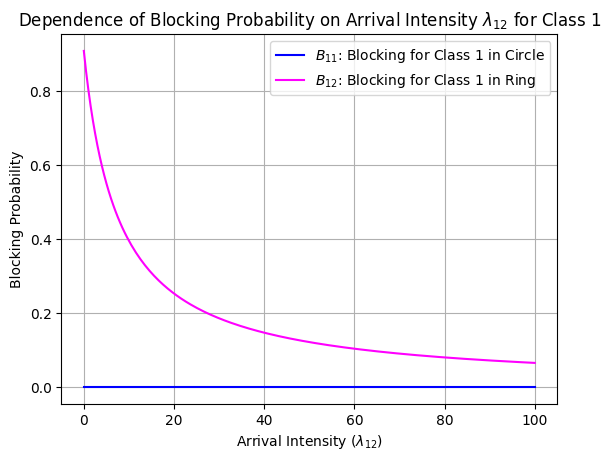

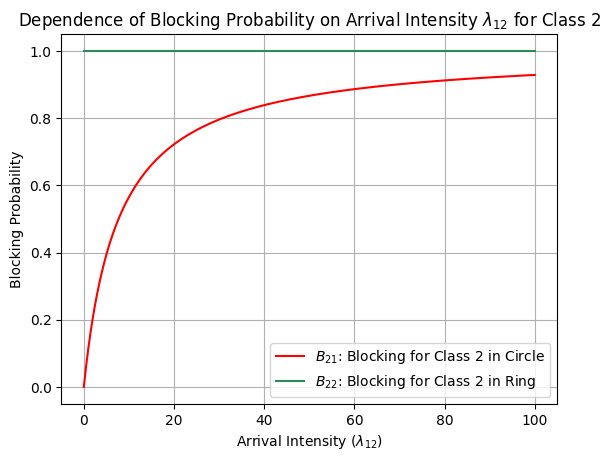

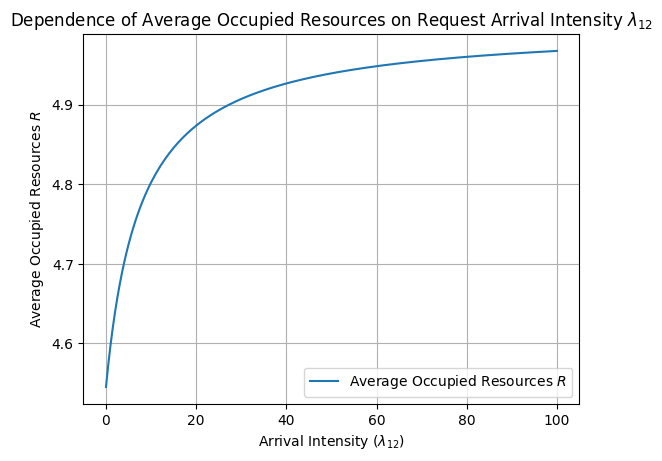

In [27]:
# Initialize lists to store the results for plotting
lambda_12_values = np.linspace(0, 100, 200)
B_11_plot = []
B_12_plot = []
B_21_plot = []
B_22_plot = []
average_resources_plot = []

# Assume b_11, b_12, b_21, b_22, lambda_12, lambda_21, lambda_22, mu_11, mu_12, mu_21, mu_22, and R are already defined
for lambda_12 in lambda_12_values:
    # Compute rho values for the current lambda_11
    rho_11 = lambda_11 / mu_11
    rho_12 = lambda_12 / mu_12
    rho_21 = lambda_21 / mu_21
    rho_22 = lambda_22 / mu_22

    # Find valid states based on the total resource limit R
    valid_states = find_valid_state(R, b_11, b_12, b_21, b_22)

    # Compute probabilities for the current set of rho values
    probabilities = compute_probabilities(rho_11, rho_12, rho_21, rho_22, valid_states)

    # Calculate blocking sets
    blocking_sets = calculate_blocking_sets(valid_states, b_11, b_12, b_21, b_22, R)

    # Calculate blocking probabilities
    blocking_probabilities = calculate_blocking_probabilities(probabilities, blocking_sets)

    # Calculate the average number of occupied resources
    average_resources = calculate_average_occupied_resources(valid_states, probabilities, b_11, b_12, b_21, b_22)

    # Store the results for plotting
    B_11_plot.append(blocking_probabilities['B_11'])
    B_12_plot.append(blocking_probabilities['B_12'])
    B_21_plot.append(blocking_probabilities['B_21'])
    B_22_plot.append(blocking_probabilities['B_22'])
    average_resources_plot.append(average_resources)

# Plot the blocking probabilities as a function of lambda_22
plt.plot(lambda_12_values, B_11_plot, label='$B_{11}$: Blocking for Class 1 in Circle', color='blue')
plt.plot(lambda_12_values, B_12_plot, label='$B_{12}$: Blocking for Class 1 in Ring', color='magenta')
plt.title('Dependence of Blocking Probability on Arrival Intensity $\lambda_{12}$ for Class 1')
plt.xlabel('Arrival Intensity ($\lambda_{12}$)')
plt.ylabel('Blocking Probability')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(lambda_12_values, B_21_plot, label='$B_{21}$: Blocking for Class 2 in Circle', color='red')
plt.plot(lambda_12_values, B_22_plot, label='$B_{22}$: Blocking for Class 2 in Ring', color='seagreen')
plt.title('Dependence of Blocking Probability on Arrival Intensity $\lambda_{12}$ for Class 2')
plt.xlabel('Arrival Intensity ($\lambda_{12}$)')
plt.ylabel('Blocking Probability')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(lambda_12_values, average_resources_plot, label='Average Occupied Resources $R$')
plt.xlabel('Arrival Intensity ($\lambda_{12}$)')
plt.ylabel('Average Occupied Resources $R$')
plt.title('Dependence of Average Occupied Resources on Request Arrival Intensity $\lambda_{12}$')
plt.legend()
plt.grid(True)
plt.show()
